# Transfer Seurat object into Scanpy object

To make SOAPy more adaptable, we provide the users a tool to transform Seurat object into SOAPy adapted format.  
To use the script here, you should prepare:  
A) Python console with: `scanpy`, `numpy`, `pandas`, `rpy2`. For Windows user to use `rpy2`, please refer to https://support.anaconda.com/hc/en-us/articles/360023857134-Setting-up-rpy2-on-Windows.  
B) R console with: `Seurat`, `dplyr`.   

In [1]:
import os
os.environ['R_HOME'] = './lib/R'
import SOAPy_st as sp
import scanpy as sc

/home/wangheqi/anaconda3/envs/SpatialOmics/lib/python3.9/site-packages/soapy/pp/utils.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _filter_of_graph(obs: pd.DataFrame,
/home/wangheqi/anaconda3/envs/SpatialOmics/lib/python3.9/site-packages/soapy/tl/utils.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit()


### 10X Visium data

In [2]:
adata = sp.pp.st_Seurat2Anndata(
    '/csb2/project/SpatialPackage_whq/Seurat2Scanpy/KIRC_5.rds',
    exp_mat_slot=['RNA','data'],
    res_type='lowres'
)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




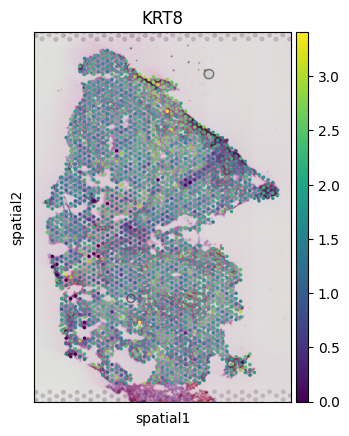

In [3]:
sc.pl.spatial(
    adata,
    color=['KRT8']
)

### Slide-Seq data

Sample data `ssHippo.rds` is built as stated in https://satijalab.org/seurat/articles/spatial_vignette#slide-seq.

In [4]:
adata = sp.pp.st_Seurat2Anndata(
    '/csb2/project/SpatialPackage_whq/Seurat2Scanpy/ssHippo.rds',
    exp_mat_slot=['Spatial','data']
)

In [5]:
adata

AnnData object with n_obs × n_vars = 53173 × 23264
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Idents'
    var: 'genome'
    obsm: 'spatial'

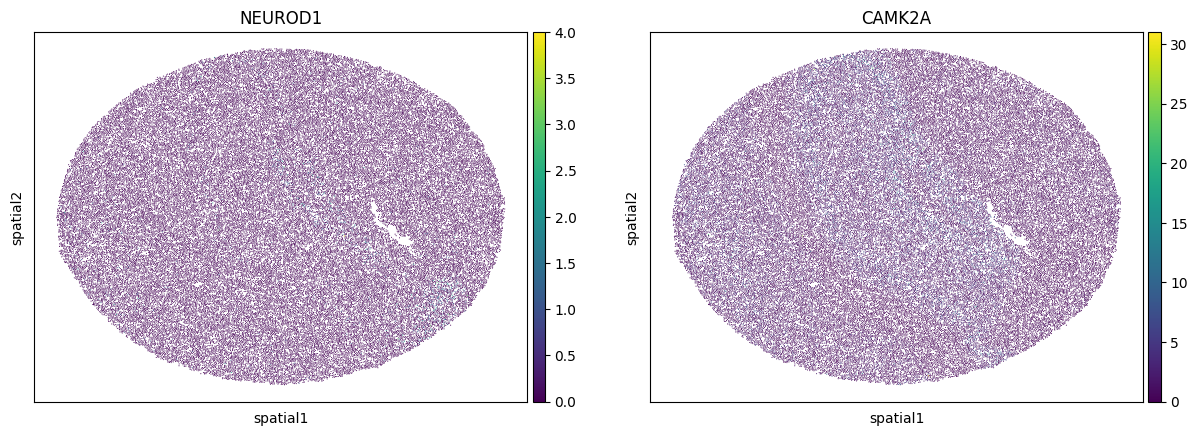

In [6]:
sc.pl.embedding(
    adata,
    basis='spatial',
    color=["NEUROD1",'CAMK2A']
)

### FOV data

Data from MERSCOPE, 10X Xenium, Nanostring CosMx, CODEX etc. were loaded as the same format in Seurat. Sample data `Xenium_mouse_brain.rds` is built as stated in https://satijalab.org/seurat/articles/spatial_vignette_2#mouse-brain-10x-genomics-xenium-in-situ-1.

In [7]:
adata = sp.pp.st_Seurat2Anndata(
    '/csb2/project/SpatialPackage_whq/Seurat2Scanpy/Xenium_mouse_brain.rds',
    exp_mat_slot=['Xenium','data']
)

In [8]:
adata

AnnData object with n_obs × n_vars = 36602 × 248
    obs: 'orig.ident', 'nCount_Xenium', 'nFeature_Xenium', 'nCount_BlankCodeword', 'nFeature_BlankCodeword', 'nCount_ControlCodeword', 'nFeature_ControlCodeword', 'nCount_ControlProbe', 'nFeature_ControlProbe', 'Idents'
    var: 'genome'
    obsm: 'spatial'

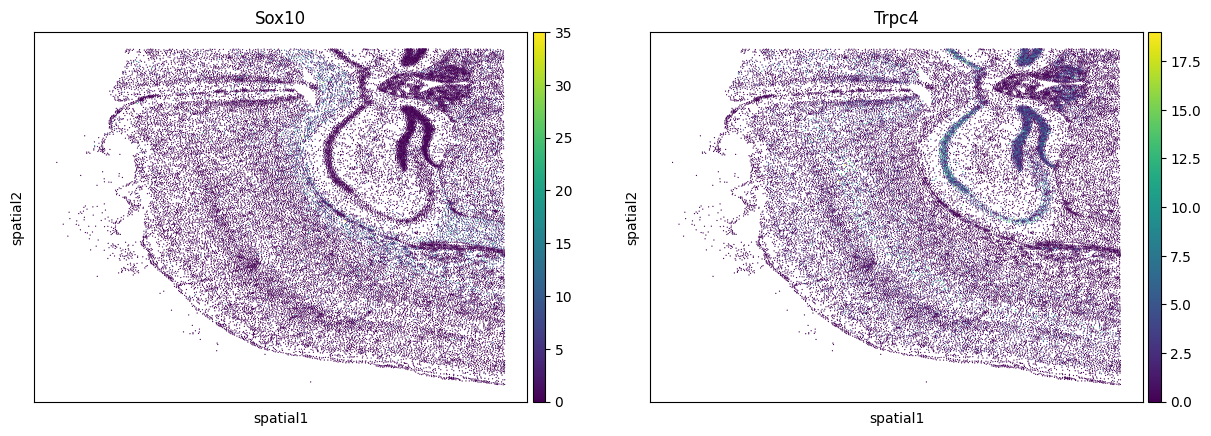

In [9]:
sc.pl.embedding(
    adata,basis='spatial',
    color=["Sox10", "Trpc4"]
)